In [1]:
import numpy as np
np.random.seed(50)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

from kneed import KneeLocator

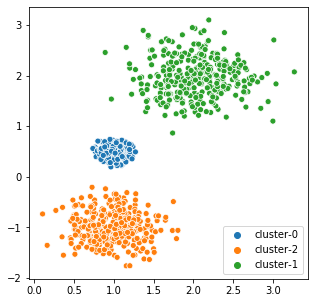

In [2]:
centers = [[1, 0.5], [2, 2], [1, -1]]
stds = [0.1, 0.4, 0.3]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state=0)

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels_true])
plt.savefig("blobs.png", dpi=300)

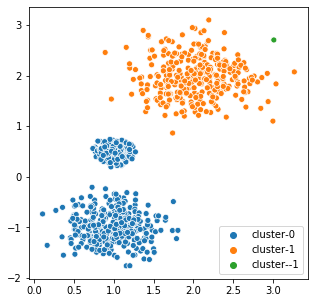

In [3]:
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
labels = db.labels_

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])
plt.savefig("dbscan_dumb.png", dpi=300)

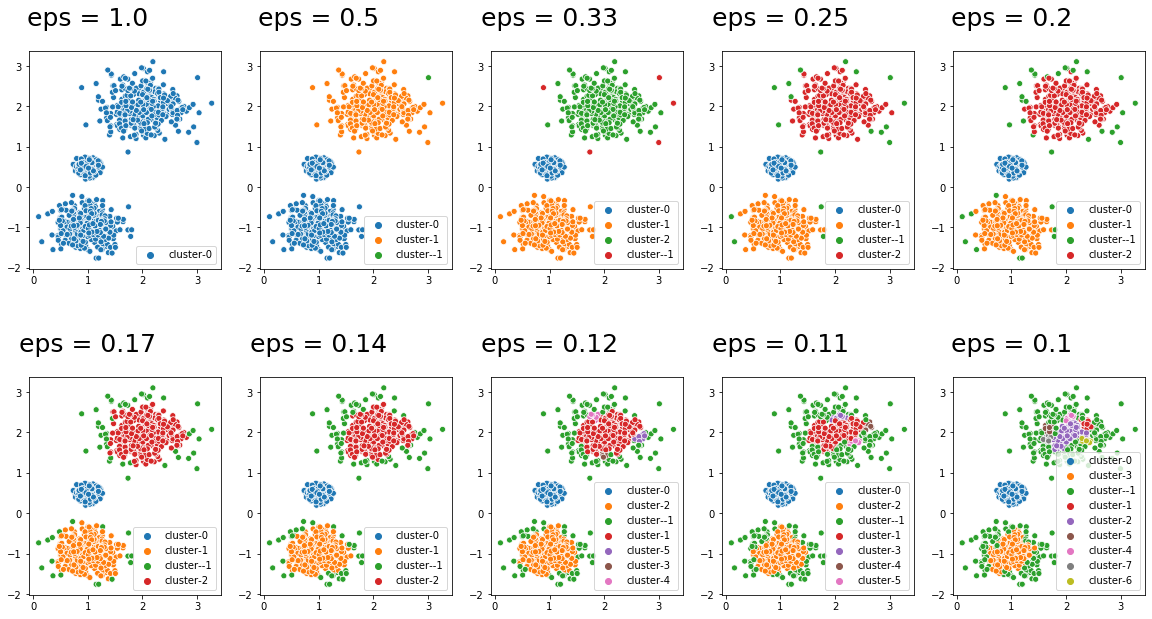

In [4]:
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1

for x in range(10, 0, -1):
    eps = 1/(11-x)
    db = DBSCAN(eps=eps, min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 2)), fontsize=25, ha="center")
    sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])
    
    i += 1
    
plt.savefig("multi_eps.png", dpi=300)

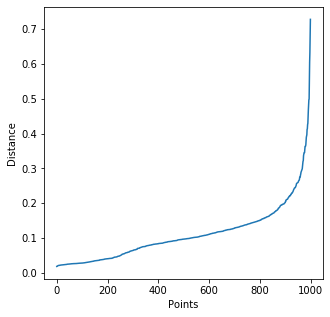

In [5]:
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)

distances = np.sort(distances[:,10], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

plt.savefig("Distance_curve.png", dpi=300)

0.17794276915465104


<Figure size 360x360 with 0 Axes>

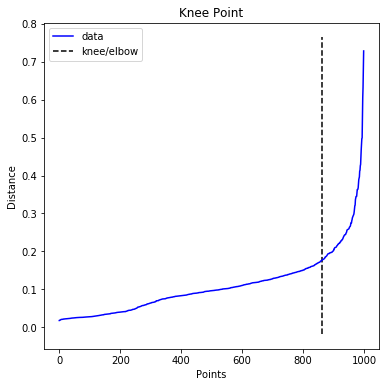

In [6]:
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.savefig("knee.png", dpi=300)
print(distances[knee.knee])

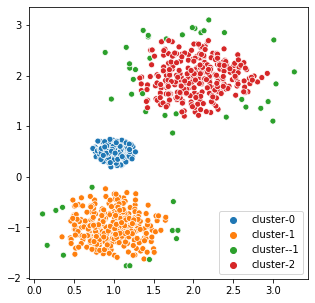

In [7]:
db = DBSCAN(eps=distances[knee.knee], min_samples=10).fit(X)
labels = db.labels_

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])
plt.savefig("dbscan_with_knee.png", dpi=300)